In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import timeseries_dataset_from_array , split_dataset
from tensorflow.keras.metrics import MeanAbsolutePercentageError , R2Score
from tensorflow.random import set_seed

In [2]:
df = pd.read_csv('DJA.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date' , inplace=True)
df['DJIA'] = np.log(df['DJIA'])
df

,DJIA
Date,
1885-02-16,3.431487
1885-02-17,3.444784
1885-02-18,3.449175
1885-02-19,3.455575
1885-02-20,3.447610
...,...
2024-02-22,10.573087
2024-02-23,10.574684
2024-02-26,10.573090


In [3]:
df.isnull().sum()

DJIA    0
dtype: int64

In [4]:
def split_for_timeseries(data , seq , train , val ):
    
    a = int(len(data)*train)
    b = int(len(data)*val) + a
    
    
    X_train = np.array(data[:a])
    y_train = np.array(data[seq:a])
    X_val = np.array(data[a-seq:b])
    y_val = np.array(data[a:b])
    X_test = np.array(data[b-seq:])
    y_test = np.array(data[b:])
    
    
    return X_train , X_val , X_test , y_train , y_val , y_test

In [5]:
X_train , X_val  , y_train , y_val  = split_for_timeseries(df , 30 , 0.999 , 0.001)

In [16]:
train = timeseries_dataset_from_array(X_train,y_train, sequence_length=30 , shuffle=False , batch_size=128  )
val =  timeseries_dataset_from_array(X_val,y_val, sequence_length=30 , shuffle=False , batch_size=128  )
#test =  timeseries_dataset_from_array(X_test,y_test, sequence_length=30 , shuffle=False , batch_size=128  )

In [17]:
model = Sequential()
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

In [18]:
model.compile(loss='mean_absolute_error', optimizer='Adam' ,  metrics=[MeanAbsolutePercentageError()])

In [27]:
history = model.fit(train, batch_size=128, epochs=16 ,  validation_data=(val))

Epoch 1/16
296/296 [==============================] - 12s 41ms/step - loss: 0.0245 - mean_absolute_percentage_error: 0.4581 - val_loss: 0.0338 - val_mean_absolute_percentage_error: 0.3219
Epoch 2/16
296/296 [==============================] - 13s 42ms/step - loss: 0.0242 - mean_absolute_percentage_error: 0.4425 - val_loss: 0.0250 - val_mean_absolute_percentage_error: 0.2383
Epoch 3/16
296/296 [==============================] - 12s 41ms/step - loss: 0.0252 - mean_absolute_percentage_error: 0.4550 - val_loss: 0.0232 - val_mean_absolute_percentage_error: 0.2219
Epoch 4/16
296/296 [==============================] - 12s 41ms/step - loss: 0.0253 - mean_absolute_percentage_error: 0.4531 - val_loss: 0.0472 - val_mean_absolute_percentage_error: 0.4502
Epoch 5/16
296/296 [==============================] - 12s 41ms/step - loss: 0.0219 - mean_absolute_percentage_error: 0.3974 - val_loss: 0.0132 - val_mean_absolute_percentage_error: 0.1256
Epoch 6/16
296/296 [==============================] - 13s 42

In [28]:
y_pred = model.predict(test)

1/1 [==============================] - 0s 109ms/step


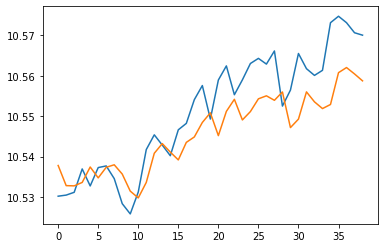

In [29]:
plt.plot(y_test )
plt.plot(y_pred)

In [30]:
from sklearn.metrics import mean_absolute_percentage_error , r2_score
print('MAPE:', mean_absolute_percentage_error(y_test,y_pred) ,'R2:', r2_score(y_test,y_pred ) )

MAPE: 0.0006834156944980993 R2: 0.644356403314535


In [31]:
x = np.array(df[-60:-30]).T
last_window = x.copy()
future_predictions = []  # Store predicted temperatures for the next 24 hours

for _ in range(10):
    next_prediction = model.predict(last_window.reshape(1, 30, 1))
    future_predictions.append(next_prediction[0])
    last_window = np.roll(last_window, -1)  # Shift the window by 1 hour
    last_window[0,-1] = next_prediction[0]


1/1 [==============================] - 0s 32ms/step
